# SciPy - Librairie d'algorithmes pour le calcul scientifique en Python

      Joseph Salmon : joseph.salmon@umontpellier.fr

Adapté du travail de 

- A. Gramfort (alexandre.gramfort@inria.fr) http://alexandre.gramfort.net/
- J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

## Introduction

SciPy s'appuie sur NumPy.

SciPy fournit des implémentations efficaces d'algorithmes standards.

Certains des sujets couverts par SciPy:

* Fonctions Spéciales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Intégration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimisation ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformées de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Traitement du Signal ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Algèbre Linéaire ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Matrices *Sparses* et Algèbre Linéaire Sparse ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistiques ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Traitement d'images N-dimensionelles ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Lecture/Ecriture Fichiers IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Durant ce cours on abordera certains de ces modules.

Pour utiliser un module de SciPy dans un programme Python il faut commencer par l'importer.

Voici un exemple avec le module *linalg*

In [1]:
from scipy import linalg

On aura besoin de NumPy:

In [2]:
import numpy as np

Et de matplotlib/pylab:

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

## Fonctions Spéciales

Un grand nombre de fonctions importantes, notamment en physique, sont disponibles dans le module *scipy.special*

Pour plus de détails: http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

One special example: the Bessel functions.

In [4]:
# jn : Bessel de premier type
# yn : Bessel de deuxième type
from scipy.special import jn, yn

In [6]:
# jn?

In [7]:
n = 0    # ordre
x = 0.0

# Bessel de premier type
print("J_%d(%s) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel de deuxième type
print("Y_%d(%s) = %f" % (n, x, yn(n, x)))

J_0(0.0) = 1.000000
Y_0(1.0) = 0.088257


<IPython.core.display.Javascript object>


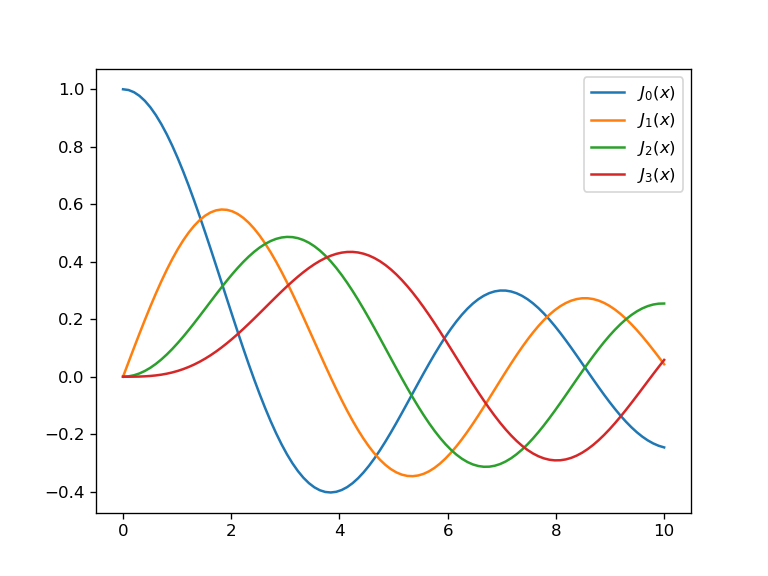

In [8]:
x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
plt.legend()

In [9]:
from scipy import special
# special?

## Intégration

### intégration numerique

L'évaluation numérique de:

$\displaystyle \int_a^b f(x) dx$

est nommée *quadrature* (abbr. quad). SciPy fournit différentes fonctions: par exemple `quad`, `dblquad` et `tplquad` pour les intégrales simples, doubles ou triples.

In [10]:
from scipy.integrate import quad, dblquad, tplquad

In [12]:
# quad?

L'usage de base:

In [13]:
# soit une fonction f
def f(x):
    return x

In [14]:
a, b = 1, 2

val, abserr = quad(f, a, b)  # intégrale entre a et b

print("intégrale =", val, ", erreur =", abserr)

intégrale = 1.5 , erreur = 1.6653345369377348e-14


In [16]:
# dblquad?

### <font color='red'> EXERCISE : Bessel function</font>


Compute the integral of the Bessel function `jn` of order 3 from 0 to 10.

Exemple intégrale double:

$\int_{x=1}^{2} \int_{y=1}^{x} (x + y^2) dx dy$

In [17]:
def f(y, x):
    return x + y**2

def gfun(x):
    return 1

def hfun(x):
    return x

print(dblquad(f, 1, 2, gfun, hfun))

(1.7500000000000002, 4.7941068289487755e-14)


### Equations différentielles ordinaires (EDO)

SciPy fournit deux façons de résoudre les EDO: Une API basée sur la fonction `odeint`, et une API orientée-objet basée sur la classe `ode`.

`odeint` est plus simple pour commencer.

Commençons par l'importer:

In [18]:
from scipy.integrate import odeint

Un système d'EDO se formule de la façon standard:

$y' = f(y, t)$

avec 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

et $f$ est une fonction qui fournit les dérivées des fonctions $y_i(t)$. Pour résoudre une EDO il faut spécifier $f$ et les conditions initiales, $y(0)$.

Une fois définies, on peut utiliser `odeint`:

    y_t = odeint(f, y_0, t)

où `t` est un NumPy *array* des coordonnées en temps où résoudre l'EDO. `y_t` est un array avec une ligne pour chaque point du temps `t`, et chaque colonne correspond à la solution `y_i(t)` à chaque point du temps. 

#### Exemple: double pendule

Description: http://en.wikipedia.org/wiki/Double_pendulum

In [19]:
from IPython.core.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Les équations du mouvement du pendule sont données sur la page wikipedia:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

où les $p_{\theta_i}$ sont les moments d'inertie. Pour simplifier le code Python, on peut introduire la variable $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [20]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """The right-hand side of the pendulum ODE"""
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [21]:
# on choisit une condition initiale
x0 = [np.pi/4, np.pi/2, 0, 0]

In [22]:
# les instants du temps: de 0 à 10 secondes
t = np.linspace(0, 10, 200)

In [23]:
# On résout
x = odeint(dx, x0, t)
print(x.shape)

(200, 4)


<IPython.core.display.Javascript object>


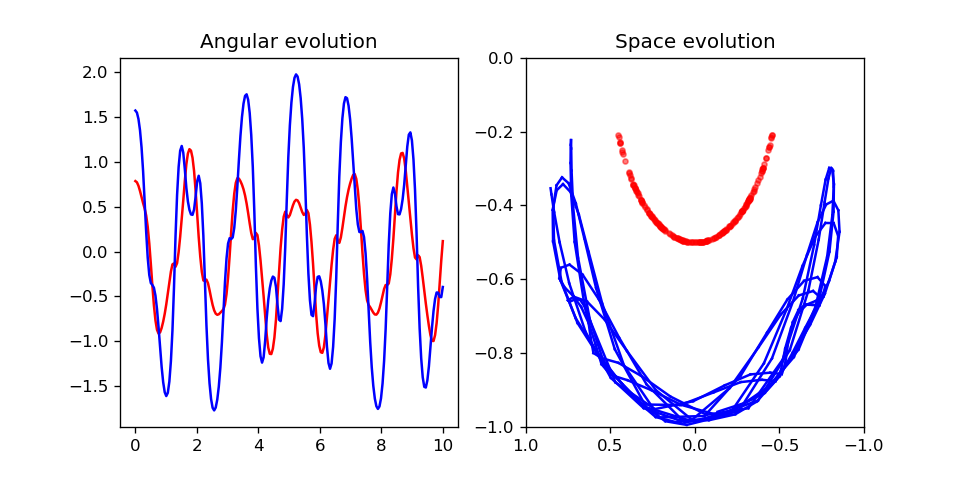

In [25]:
# affichage des angles en fonction du temps
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")
axes[0].set_title("Angular evolution")


x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])
x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])

# axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1])
axes[1].set_title("Space evolution")
for i in range(len(t)-1):
    axes[1].plot(x2[i:i+2], y2[i:i+2], '-', color='blue',alpha=1)
    axes[1].plot(x1[i], y1[i], '.', color='red', label="pendulum1", alpha=0.5)
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.pause(0.001)

### <font color='red'> EXERCISE : alpha and time </font>
Modify the code above so that on the right plot the older point in time are more transparent than the new ones.


## Algèbre linéaire

Le module de SciPy pour l'algèbre linéaire est `linalg`. Il inclut des routines pour la résolution des systèmes linéaires, recherche de vecteur/valeurs propres, SVD, Pivot de Gauss (LU, cholesky), calcul de déterminant etc.

Documentation : http://docs.scipy.org/doc/scipy/reference/linalg.html

#### Résolution d'equations linéaires

Trouver x tel que:

$A x = b$

avec $A$ une matrice et $x,b$ des vecteurs.

In [27]:
A = np.array([[1,0,3], [4,5,12], [7,8,9]], dtype=np.float)
b = np.array([[1,2,3]], dtype=np.float).T
print(A)
print(b)

[[ 1.  0.  3.]
 [ 4.  5. 12.]
 [ 7.  8.  9.]]
[[1.]
 [2.]
 [3.]]


In [28]:
from scipy import linalg
x = linalg.solve(A, b)
print(x)

[[ 0.8       ]
 [-0.4       ]
 [ 0.06666667]]


In [29]:
print(x.shape)
print(b.shape)

(3, 1)
(3, 1)


In [30]:
# Check the result
np.allclose(A @ x,b, atol=1e-18, rtol=1e-30)

True

**Remark**: NEVER (or you should really know why) invert a matrix. ALWAYS solve linear systems instead!

#### Valeurs propres et vecteurs propres

$\displaystyle A v_n = \lambda_n v_n$

avec $v_n$ le $n$ème vecteur propre et $\lambda_n$ la $n$ème valeur propre.

Les fonctions sont: `eigvals` et `eig`

In [31]:
A = np.random.randn(3, 3)

In [32]:
evals, evecs = linalg.eig(A)

In [33]:
evals

array([-1.04257208+0.79855084j, -1.04257208-0.79855084j,
        2.22165841+0.j        ])

In [34]:
evecs

array([[-0.871854  +0.j        , -0.871854  -0.j        ,
        -0.22482804+0.j        ],
       [ 0.19270041+0.22382048j,  0.19270041-0.22382048j,
         0.28896171+0.j        ],
       [-0.29094659-0.26075206j, -0.29094659+0.26075206j,
         0.93056622+0.j        ]])

### <font color='red'> EXERCISE : Eigen values/vectors</font>


Verify numerically that the output from linalg.eig are indeed approximately eigen values and eigen vectors of the matrix A above.

*Hint* : use https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html

If A is symmetric you **should** use `eigvalsh` (H for Hermitian) instead. More robust

In [35]:
A = A + A.T
evals = linalg.eigvalsh(A)
print(evals)

[-4.88911975 -0.00557408  5.16772231]


In [36]:
print(linalg.eigh(A))

(array([-4.88911975, -0.00557408,  5.16772231]), array([[ 0.88017082,  0.40249774,  0.25158477],
       [ 0.46815907, -0.64874268, -0.59996669],
       [-0.07827146,  0.64585486, -0.75943734]]))


#### Opérations matricielles

In [37]:
# inversion: please never use that :)
linalg.inv(A)

array([[-29.2101064 ,  46.73147541, -46.65932065],
       [ 46.73147541, -75.47951782,  75.26390887],
       [-46.65932065,  75.26390887, -74.72328766]])

In [38]:
# déterminant
linalg.det(A)

0.14083248460626102

In [39]:
# normes
print(linalg.norm(A, ord='fro'))  # fro for Frobenius
print((np.sum(A**2))**0.5)
print(linalg.norm(A, ord=2))
print((linalg.eigvalsh(A.T@A)**0.5))
print(linalg.norm(A, ord=np.inf))

7.11399162580801
7.11399162580801
5.167722307368819
[0.00557408 4.88911975 5.16772231]
6.906587096554987


### <font color='red'> EXERCISE : Norms computation</font>
Check numerically what is the instruction  `linalg.norm(A, ord=np.inf)` really computing.
Double check with the help, and a numerical test.

## Optimisation

**Objectif**: trouver les minima ou maxima d'une fonction

Doc : http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

On commence par l'import

In [40]:
from scipy import optimize

### Trouver un minimum

In [47]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

<IPython.core.display.Javascript object>


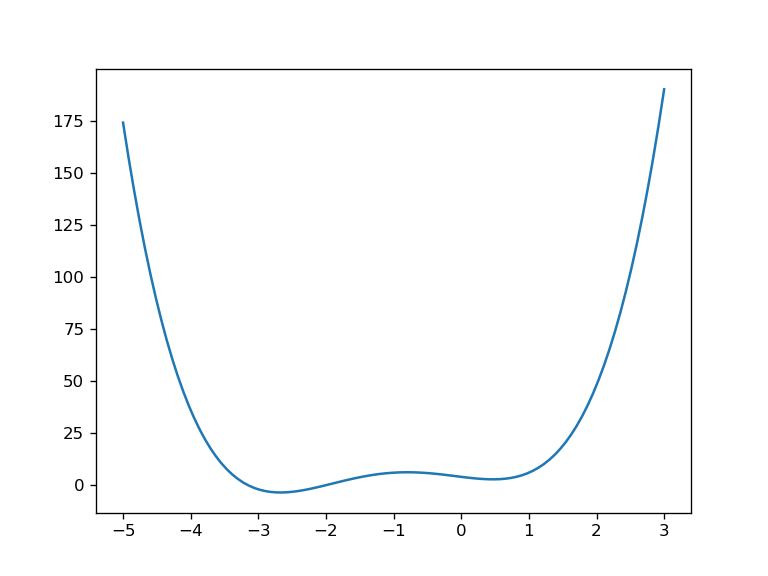

In [48]:
x = np.linspace(-5, 3, 100)
plt.figure()
plt.plot(x, f(x))
plt.show()

Nous allons utiliser la fonction `fmin_bfgs`:

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 9
         Function evaluations: 30
         Gradient evaluations: 10


<IPython.core.display.Javascript object>


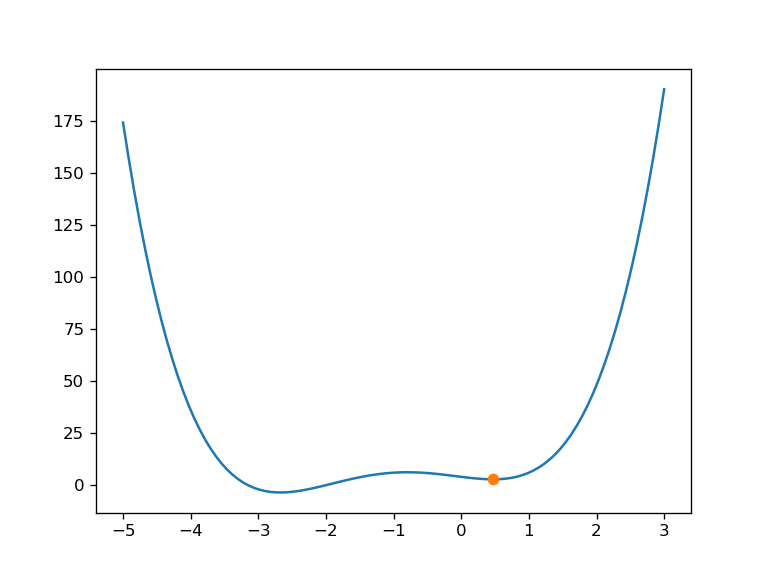

In [49]:
x_min = optimize.fmin_bfgs(f, x0=3)
plt.figure()
plt.plot(x, f(x))
plt.plot(x_min, f(x_min),'o')
plt.show()

### <font color='red'> EXERCISE : Bassin of attraction</font>

Draw the points on the curves with 2 different color : orange for the points leading to find the left local minima, and red for the points leading to the right local minima.


In [50]:
grid = np.linspace(-5,3,num=100)
x_gauche = optimize.fmin_bfgs(f, x0=-3, disp=False)[0]
x_droite = optimize.fmin_bfgs(f, x0=3, disp=False)[0]
print(x_droite,x_gauche)

# XXX

0.4696174576694971 -2.672981611734936


### Find the zeros of a function

Find $x$ such that $f(x) = 0$, with `fsolve`.

In [51]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c / omega

<IPython.core.display.Javascript object>


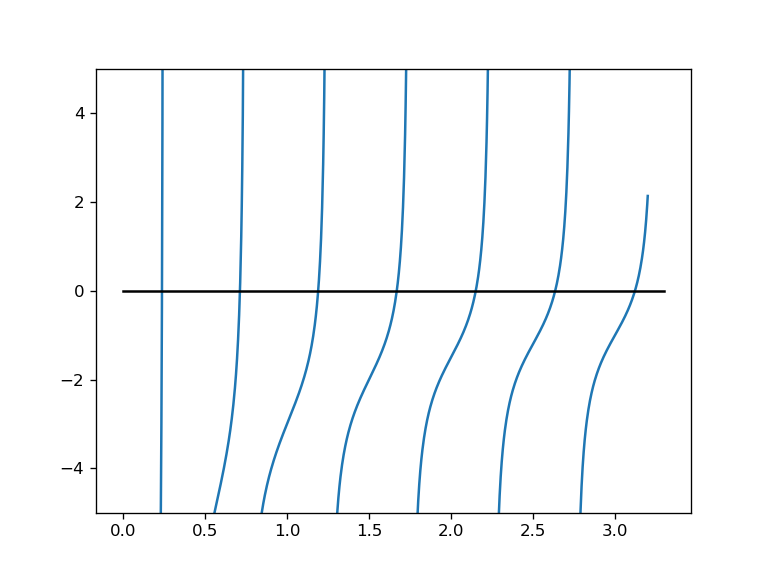

(-5, 5)

In [52]:
x = np.linspace(1e-8, 3.2, 1000)
y = f(x)
mask = np.where(np.abs(y) > 50)
x[mask] = y[mask] = np.nan # get rid of vertical line when the function flip sign
plt.figure()
plt.plot(x, y)
plt.plot([0, 3.3], [0, 0], 'k')
plt.ylim(-5,5)

In [ ]:
optimize.fsolve(f, 0.72)

In [53]:
optimize.fsolve(f, 1.1)

array([1.18990285])

In [54]:
optimize.fsolve(f, np.linspace(0.001, 3, 20))

array([2.37430141e-01, 4.10116215e+01, 3.80125347e+01, 9.35051045e+01,
       9.65049460e+01, 1.90248919e+01, 1.69002825e+02, 3.26001465e+02,
       5.08483381e+00, 6.75070682e+01, 9.50050240e+01, 4.59210115e+00,
       2.75172832e+01, 1.01450047e+03, 1.66919049e+00, 2.63528611e+00,
       1.30003672e+02, 2.63528611e+00, 1.32003616e+02, 9.65049460e+01])

In [55]:
np.unique(np.round(optimize.fsolve(f, np.linspace(0.2, 3, 20)), 3))

array([0.237, 0.713, 1.19 , 1.669, 2.151, 2.635, 3.122])

<IPython.core.display.Javascript object>


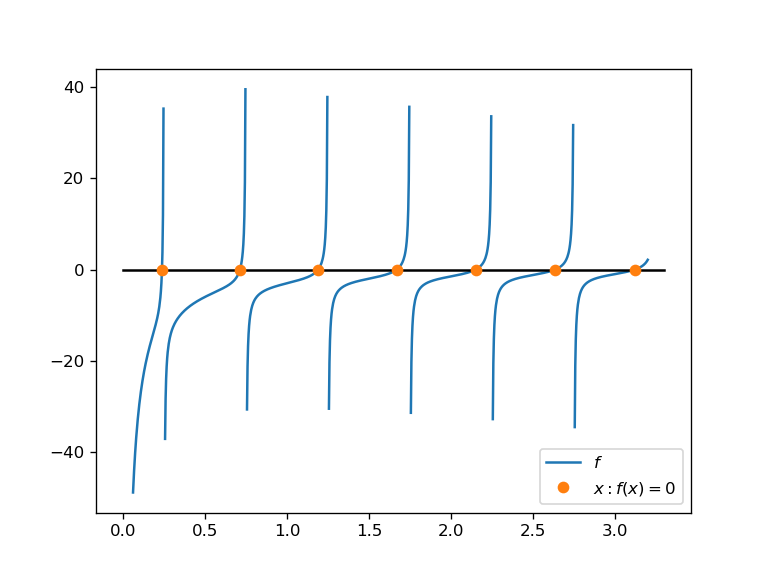

In [56]:
my_zeros = np.unique((optimize.fsolve(f, np.linspace(0.2, 3, 20)) * 1000).astype(int)) / 1000.
plt.figure()
plt.plot(x, y, label='$f$')
plt.plot([0, 3.3], [0, 0], 'k')
plt.plot(my_zeros,np.zeros(my_zeros.shape),'o', label='$x : f(x)=0$')
plt.legend()
plt.show()

#### Estimation de paramètres de fonctions

In [57]:
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """
    f(x) = a exp(-bx) + c
    """
    return a*np.exp(-b*x) + c


x = np.linspace(0, 4, 50)
y = f(x, 2.5, 1.3, 0.5)  # true signal
yn = y + 0.2*np.random.randn(len(x))  # noisy added

<IPython.core.display.Javascript object>


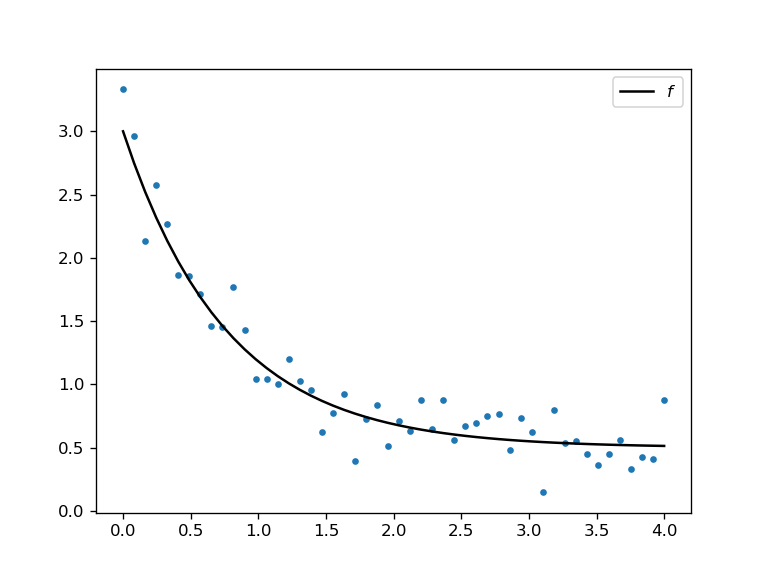

In [58]:
plt.figure()
plt.plot(x, yn,'.')
plt.plot(x, y, 'k', label='$f$')
plt.legend()

In [61]:
(a, b, c), _ = curve_fit(f, x, yn)
print(a, b, c)

2.6289688429933435 1.3880997894476756 0.5276491935379232


In [64]:
# curve_fit?

On affiche la fonction estimée:

<IPython.core.display.Javascript object>


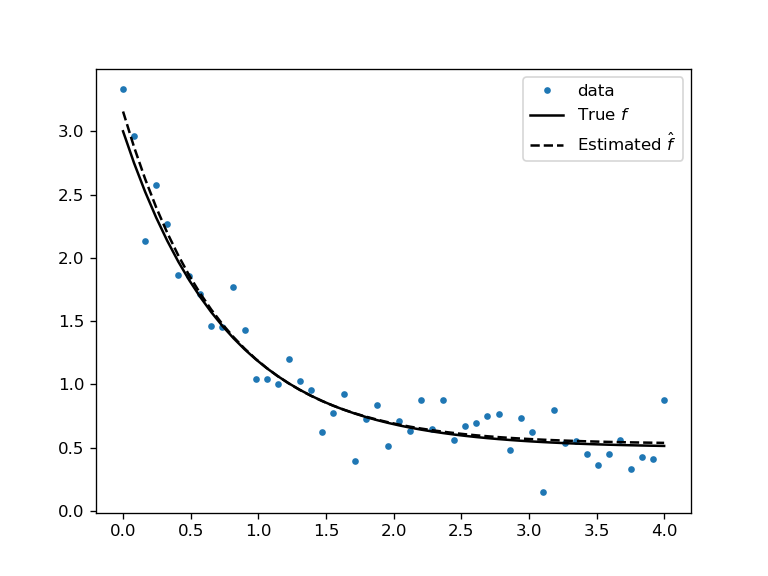

In [65]:
plt.figure()
plt.plot(x, yn, '.', label='data')
plt.plot(x, y, 'k', label='True $f$')
plt.plot(x, f(x, a, b, c),'--k', label='Estimated $\hat{f}$')
plt.legend()
plt.show()

Dans le cas de polynôme on peut le faire directement avec NumPy

/home/jo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


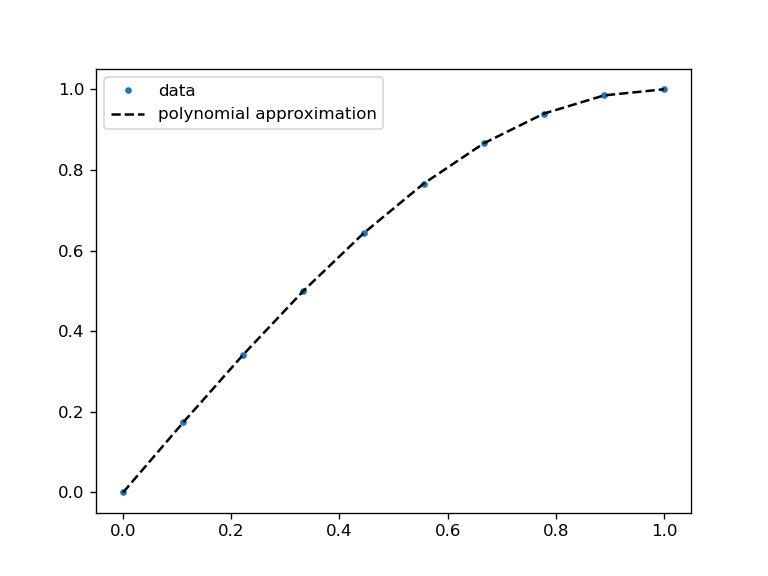

In [66]:
x = np.linspace(0,1,10)
y = np.sin(x * np.pi / 2.)
line = np.polyfit(x, y, deg=10)
plt.figure()
plt.plot(x, y, '.', label='data')
plt.plot(x, np.polyval(line,x), 'k--', label='polynomial approximation')
plt.legend()
plt.show()
# xx = np.linspace(-5,4,100)
# plt.plot(xx, np.polyval(line,xx), 'g')

## Interpolation

In [67]:
from scipy.interpolate import interp1d

In [68]:
def f(x):
    return np.sin(x)

In [69]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # ajout de bruit
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

In [72]:
from scipy.interpolate import barycentric_interpolate, BarycentricInterpolator
# BarycentricInterpolator??

<IPython.core.display.Javascript object>


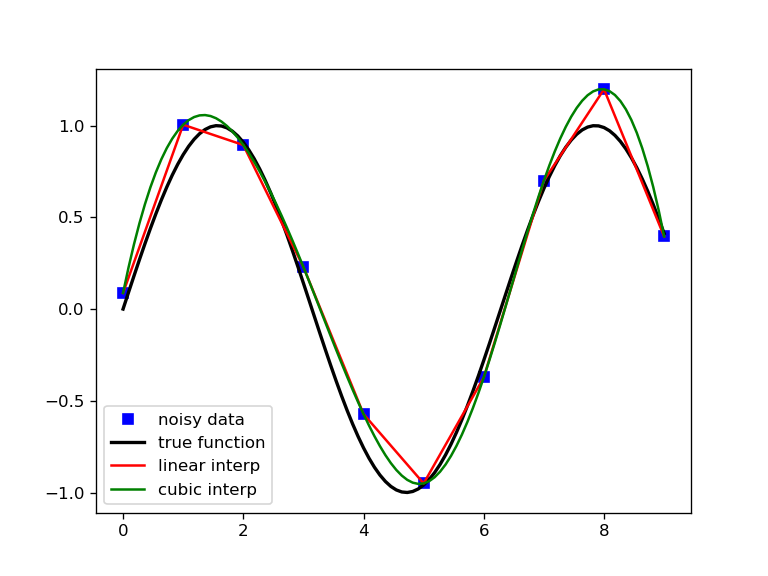

In [73]:
plt.figure()
plt.plot(n, y_meas, 'bs', label='noisy data')
plt.plot(x, y_real, 'k', lw=2, label='true function')
plt.plot(x, y_interp1, 'r', label='linear interp')
plt.plot(x, y_interp2, 'g', label='cubic interp')
plt.legend(loc=3)
plt.show()

### Images

In [117]:
from scipy import ndimage, misc
img = misc.face()
type(img), img.dtype, img.ndim, img.shape

(numpy.ndarray, dtype('uint8'), 3, (768, 1024, 3))

In [118]:
2**8  # uint8-> code sur 256 niveau.

256

In [119]:
n_1 , n_2, n_3 = img.shape
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<IPython.core.display.Javascript object>


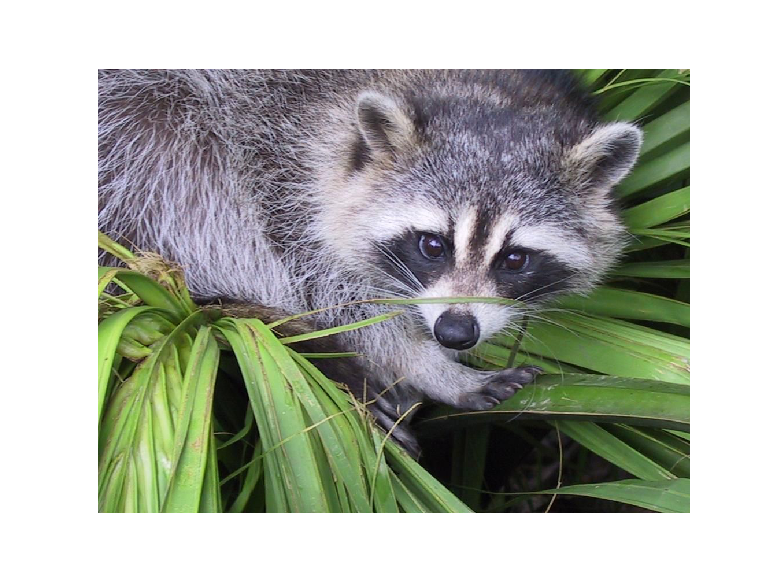

In [120]:
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


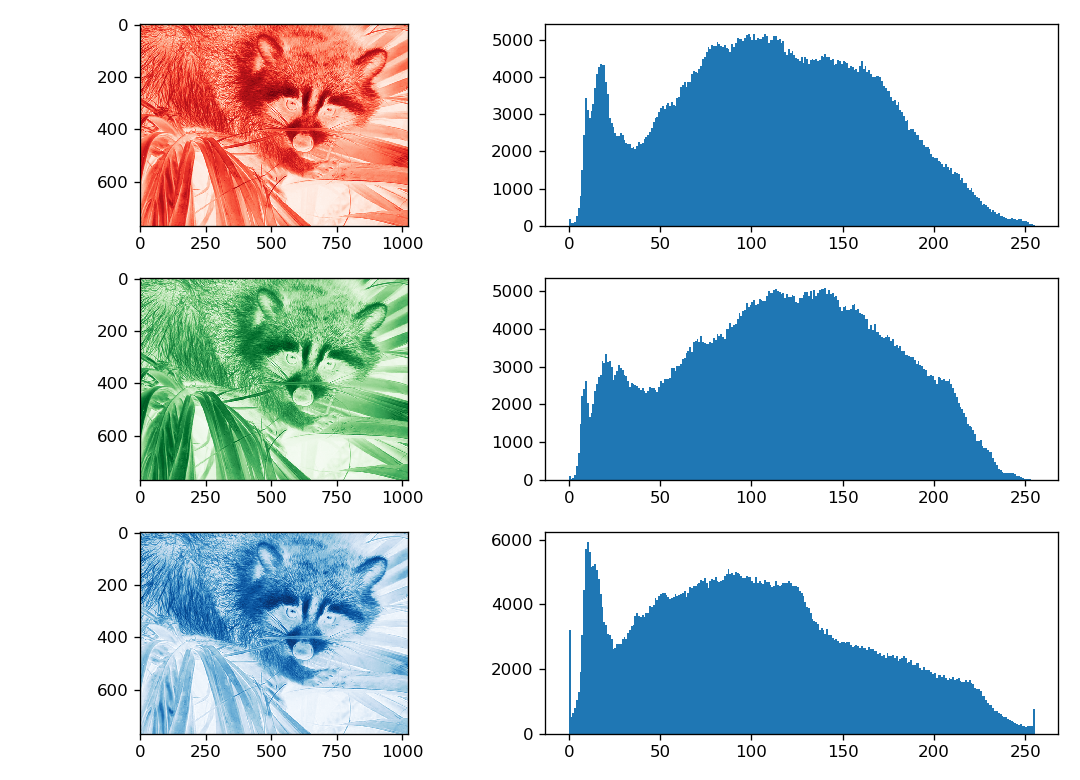

In [125]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(9, 6.5)
n_1 , n_2, n_3 = img.shape

ax[0, 0].imshow(img[:, :, 0], cmap=plt.cm.Reds)
ax[0, 1].hist(img[:, :, 0].reshape(n_1 * n_2), np.arange(0,256))

ax[1, 0].imshow(img[:, :, 1], cmap=plt.cm.Greens)
ax[1, 1].hist(img[:, :, 1].reshape(n_1 * n_2), np.arange(0,256))

ax[2, 0].imshow(img[:, :, 2], cmap=plt.cm.Blues)
ax[2, 1].hist(img[:, :, 2].reshape(n_1 * n_2), np.arange(0,256))

plt.tight_layout()

In [121]:
print(img.flags)  #cannot edit...
img_compressed = img.copy()
img_compressed.setflags(write=1)
print(img_compressed.flags)  #can edit now

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


<IPython.core.display.Javascript object>


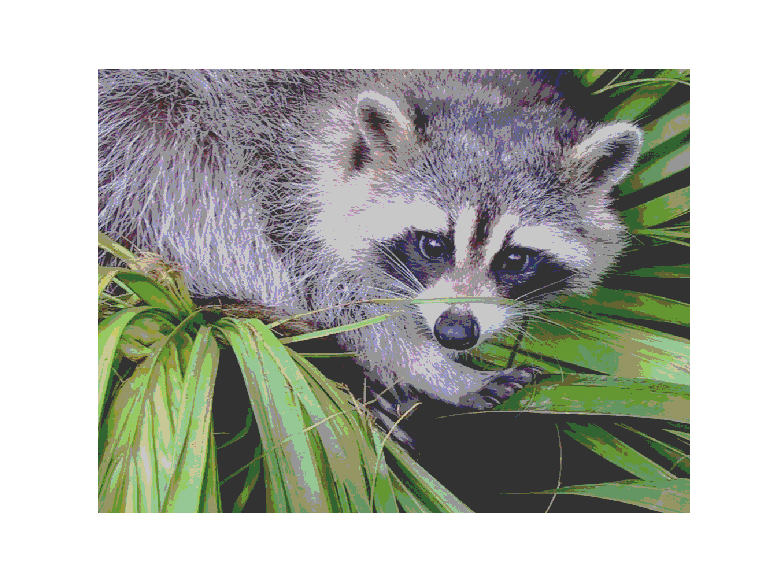

In [83]:
img_compressed[img_compressed < 70] = 50
img_compressed[(img_compressed >= 70) & (img_compressed < 110)] = 100
img_compressed[(img_compressed >= 110) & (img_compressed < 180)] = 150
img_compressed[(img_compressed >= 180)] = 200
plt.figure()
plt.imshow(img_compressed, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Ajout d'un flou

<IPython.core.display.Javascript object>


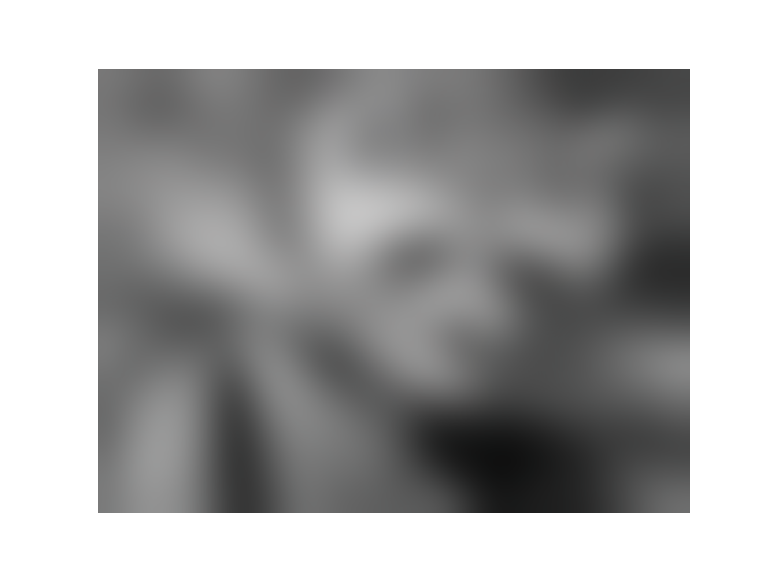

In [84]:
img_flou = ndimage.gaussian_filter(img, sigma=40)
plt.figure()
plt.imshow(img_flou, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Conversion de l'image en niveaux de gris et affichage:

In [ ]:
plt.figure()
plt.imshow(np.mean(img, axis=2), cmap=plt.cm.gray)
plt.show()

### <font color='red'> EXERCISE : Color</font>
Change the color of the flag to make it frenchier (e.g. use blue, white, red)

<IPython.core.display.Javascript object>


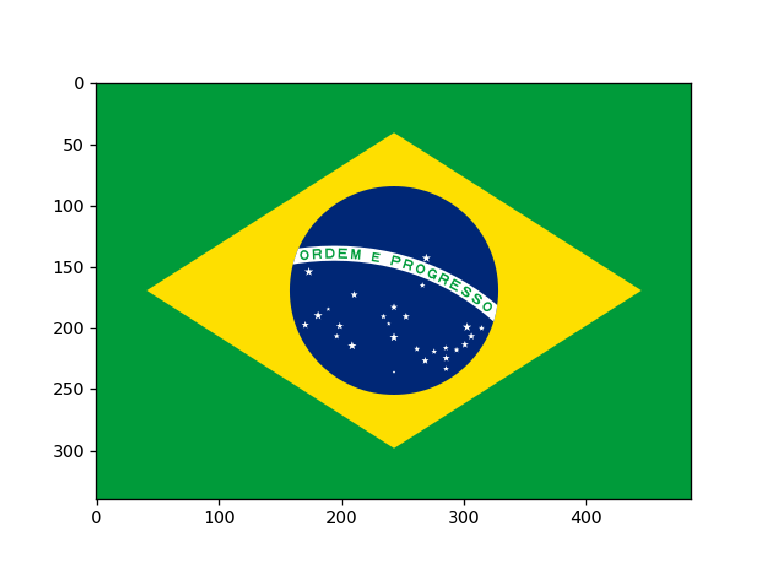

In [142]:
img = (255 * plt.imread('https://upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/486px-Flag_of_Brazil.svg.png')).astype(np.int)

plt.figure()
plt.imshow(img)
plt.show()

<IPython.core.display.Javascript object>


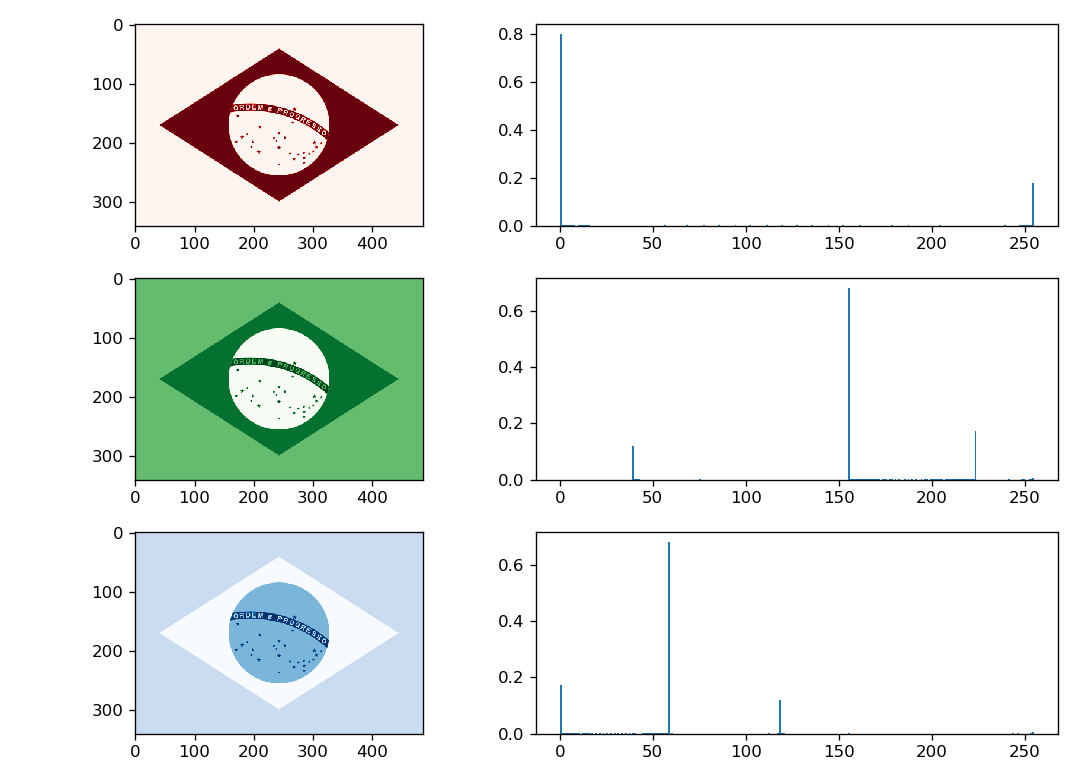

In [127]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(9, 6.5)
n_1, n_2, n_3 = img.shape

ax[0, 0].imshow(img[:, :, 0], cmap=plt.cm.Reds)
ax[0, 1].hist(img[:, :, 0].reshape(n_1 * n_2), np.arange(0, 256), density=True)

ax[1, 0].imshow(img[:, :, 1], cmap=plt.cm.Greens)
ax[1, 1].hist(img[:, :, 1].reshape(n_1 * n_2), np.arange(0, 256), density=True)

ax[2, 0].imshow(img[:, :, 2], cmap=plt.cm.Blues)
ax[2, 1].hist(img[:, :, 2].reshape(n_1 * n_2), np.arange(0, 256), density=True)

plt.tight_layout()

<IPython.core.display.Javascript object>


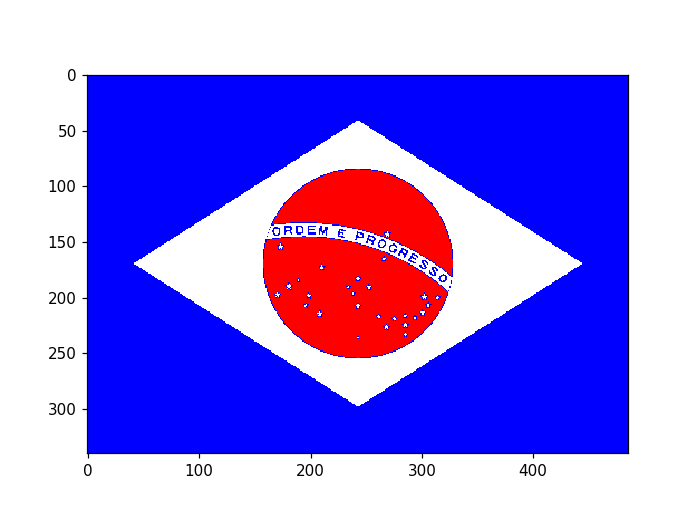

In [217]:
# colors levels
img = (255 * plt.imread('https://upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/486px-Flag_of_Brazil.svg.png')).astype(np.int)
img =img.copy()
plt.figure()

find_white_green = img[:, :, 1] > 200 # center
find_light_green = (img[:, :, 1] <=200)*(img[:, :, 1]>50)  # center
find_dark_green = img[:, :, 1] <= 50 # center


# red part
img[:, :, 0][find_dark_green] = 255
img[:, :, 1][find_dark_green] = 0
img[:, :, 2][find_dark_green] = 0


#  white part
img[:, :, 0][find_white_green] = 255
img[:, :, 1][find_white_green] = 255
img[:, :, 2][find_white_green] = 255

# blue part
img[:, :, 0][find_light_green] = 0
img[:, :, 1][find_light_green] = 0
img[:, :, 2][find_light_green] = 255

plt.imshow(img)
plt.show()

# More for colors/ images:
http://josephsalmon.eu/enseignement/Montpellier/HLMA310/matplotlib_slides.pdf


## Discrete Fourrier Transform / Fast Fourier Transform (FFT)

SciPy uses the library [FFTPACK](http://www.netlib.org/fftpack/) written in FORTRAN.

Help on FFT (in French): https://courspython.com/fft-introduction.html

In [ ]:
from scipy import fftpack

Nous allons calculer les transformées de Fourier discrètes de fonctions spéciales:

In [ ]:
from scipy.signal import gausspulse

t = np.linspace(-1, 1, 1000)
x = gausspulse(t, fc=20, bw=0.5)

#  Compute FFT
F = fftpack.fft(x)

from cmath import phase
# calcul des fréquences en Hz si on suppose un échantillonage à 1000Hz
freqs = fftpack.fftfreq(len(x), 1. / 1000.)
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(t, x) # plot du signal
axes[0].set_ylim([-2, 2])
axes[0].set_xlabel('Time series (s)')

axes[1].plot(freqs, np.abs(F)) # plot du module de la TFD
axes[1].set_xlim([0, 200])
axes[1].set_xlabel('Freq (Hz)')
axes[1].set_ylabel('|FFT|')

# mask = (freqs > 0) & (freqs < 200)

plt.show()

### <font color='red'> EXERCISE : FFT</font>

Le signal est réel du coup la FFT est symétrique.

Afficher la TFD restreinte aux fréquences positives et la TFD restreinte aux fréquences entre 0 et 200Hz.

## Pour aller plus loin

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 
* http://scipy-lectures.github.io
